# Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Dataset

In [3]:
data = load_boston()
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# 2D Linear Regression

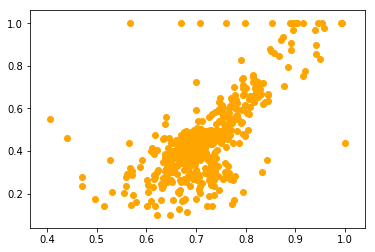

In [4]:
x = np.array(data.data[:,5]) / np.amax(data.data[:,5])
y = np.array(data.target) / np.amax(data.target)
plt.scatter(x,y,color='orange')

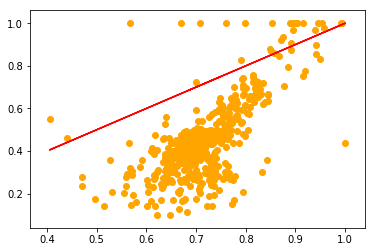

Loss


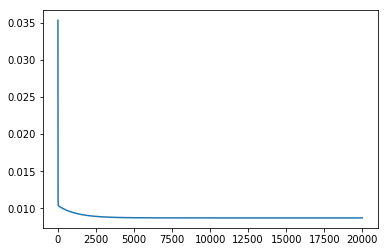

Final Loss:  0.00872011043200312
prediction


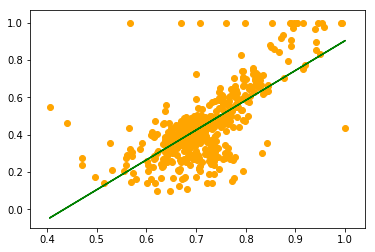

In [4]:
#gradient descent
lr = 0.1
a = 1
b = 0
predict = a*x + b
plt.scatter(x,y,color="orange")
plt.plot(x,predict, color="red")
plt.show()
lossArr = []
epochArr = []
for i in range(20001):
    Grad_a = np.sum((predict - y)*x)*(1/(len(predict)))
    Grad_b = np.sum(predict - y)*(1/(len(predict)))
    a = a - lr * Grad_a
    b = b - lr * Grad_b
    predict = a*x + b
    loss = np.sum((predict - y)**2)*(1/(2*(len(predict))))
    if i % 10 == 0:
        #print("Epoch: ", i, "Loss: ", loss)
        lossArr.append(loss)
        epochArr.append(i)
    if i == 20000:
        print("Loss")
        plt.plot(epochArr,lossArr)
        plt.show()
        print("Final Loss: ", loss)
GDpredict = predict
print('prediction')
plt.scatter(x,y, color="orange")
plt.plot(x, GDpredict, color="green")
plt.show()  

(2,)


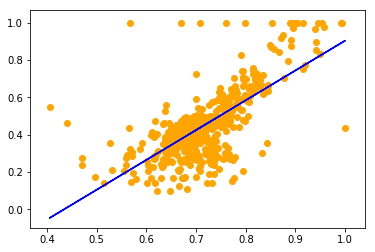

In [8]:
#ordinary least squares
xs = np.array([np.ones(len(x)),x]).T
b = np.linalg.inv(xs.T @ xs) @ xs.T @ y
OLSpredict = xs @ b
plt.scatter(x,y, color="orange")
plt.plot(x, OLSpredict, color="blue")
plt.show()

Ordinary Least Squares
Loss:  0.008720110354233913


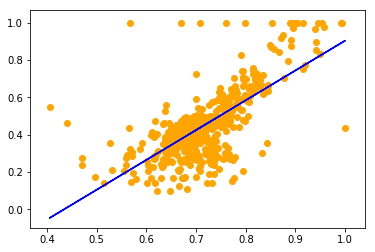

Gradient Descent
Loss:  0.00872011043200312


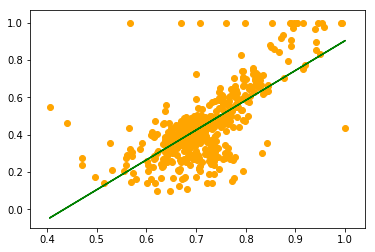

In [6]:
#Comparation
plt.scatter(x,y, color="orange")
plt.plot(x, OLSpredict, color="blue")
print("Ordinary Least Squares")
print("Loss: ",np.sum((OLSpredict - y)**2)*(1/(2*len(x))))
plt.show()
plt.scatter(x,y, color="orange")
plt.plot(x, GDpredict,"green")
print("Gradient Descent")
print("Loss: ", loss)
plt.show()